In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt


X_train, X_test, y_train, y_test = train_test_split(
    *load_breast_cancer(return_X_y=True), test_size=0.3, random_state=42
)


In [4]:
# 2. Baseline: Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)

In [5]:
# 3. Bagging
bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=50,
    random_state=42
)
bagging.fit(X_train, y_train)
y_pred_bag = bagging.predict(X_test)
acc_bag = accuracy_score(y_test, y_pred_bag)

In [6]:
# 4. Boosting (AdaBoost)
boosting = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=50,
    random_state=42
)
boosting.fit(X_train, y_train)
y_pred_boost = boosting.predict(X_test)
acc_boost = accuracy_score(y_test, y_pred_boost)

In [7]:
# 5. Comparison Table
results = pd.DataFrame({
    "Model": ["Decision Tree", "Bagging", "Boosting"],
    "Accuracy": [acc_dt, acc_bag, acc_boost]
})
print(results)

           Model  Accuracy
0  Decision Tree  0.941520
1        Bagging  0.959064
2       Boosting  0.970760


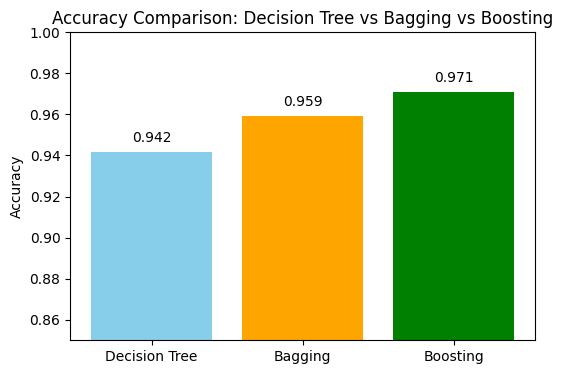

In [8]:
# 6. Plot Comparison
plt.figure(figsize=(6,4))
plt.bar(results["Model"], results["Accuracy"], color=["skyblue","orange","green"])
plt.ylim(0.85,1.0)
plt.title("Accuracy Comparison: Decision Tree vs Bagging vs Boosting")
plt.ylabel("Accuracy")
for i, acc in enumerate(results["Accuracy"]):
    plt.text(i, acc+0.005, f"{acc:.3f}", ha="center")
plt.show()